<a href="https://colab.research.google.com/github/shakedoren1/ObjectDetection/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG16 Classification of cats and dogs

##Setting up the code environment:

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [2]:
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 19s 0us/step


Getting the Oxford-IIIT Pet Dataset:

In [3]:
%%capture
!wget https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/datasets/pets/annotations.tar.gz
!tar -xvzf images.tar.gz && tar -xvzf annotations.tar.gz
!rm  images/*.mat

Creating a mapping of labels for each picture in the dataset:

In [4]:
image_files = os.listdir('images/')

def extract_breed(filename):
    # This regex pattern matches the last underscore followed by any number of digits and the file extension
    pattern = re.compile(r'(.+)_\d+\.jpg$')
    match = pattern.match(filename)
    if match:
        # Extract the breed name, replace underscores with spaces for readability
        breed_name = match.group(1).replace('_', ' ')
        return breed_name
    else:
        # Return None or a default value if the filename doesn't match the pattern
        return None

# Create a dictionary mapping filenames to formatted breed names
label_mapping = {file: extract_breed(file) for file in image_files if extract_breed(file) is not None}

# Convert the dictionary values to a set to get unique labels
unique_labels = set(label_mapping.values())

# Convert the set to a list and sort it
sorted_labels = sorted(list(unique_labels))

# Print the count of unique labels
print(f"Number of unique labels: {len(sorted_labels)}")

# Iterate through the sorted list and print each unique label
for label in sorted_labels:
    print(label)

Number of unique labels: 37
Abyssinian
Bengal
Birman
Bombay
British Shorthair
Egyptian Mau
Maine Coon
Persian
Ragdoll
Russian Blue
Siamese
Sphynx
american bulldog
american pit bull terrier
basset hound
beagle
boxer
chihuahua
english cocker spaniel
english setter
german shorthaired
great pyrenees
havanese
japanese chin
keeshond
leonberger
miniature pinscher
newfoundland
pomeranian
pug
saint bernard
samoyed
scottish terrier
shiba inu
staffordshire bull terrier
wheaten terrier
yorkshire terrier


Creating a mapping of the label in Oxford-IIIT Pet dataset to the animal type and the corresponding label that VGG16 was trained on:

In [5]:
breed_to_vgg16_mapping = {
    'Abyssinian': ('cat', None), # No corresponding label in VGG16
    'Bengal': ('cat', None),
    'Birman': ('cat', None),
    'Bombay': ('cat', None),
    'British Shorthair': ('cat', None),
    'Egyptian Mau': ('cat', 'Egyptian_cat'),
    'Maine Coon': ('cat', None),
    'Persian': ('cat', 'Persian_cat'),
    'Ragdoll': ('cat', None),
    'Russian Blue': ('cat', None),
    'Siamese': ('cat', 'Siamese_cat'),
    'Sphynx': ('cat', None),

    'american bulldog': ('dog', None),
    'american pit bull terrier': ('dog', None),
    'basset hound': ('dog', 'basset'),
    'beagle': ('dog', 'beagle'),
    'boxer': ('dog', 'boxer'),
    'chihuahua': ('dog', 'Chihuahua'),
    'english cocker spaniel': ('dog', 'cocker_spaniel'),
    'english setter': ('dog', 'English_setter'),
    'german shorthaired': ('dog', 'German_short-haired_pointer'),
    'great pyrenees': ('dog', 'Great_Pyrenees'),
    'havanese': ('dog', None),
    'japanese chin': ('dog', 'Japanese_spaniel'),
    'keeshond': ('dog', 'keeshond'),
    'leonberger': ('dog', 'Leonberg'),
    'miniature pinscher': ('dog', 'miniature_pinscher'),
    'newfoundland': ('dog', 'Newfoundland'),
    'pomeranian': ('dog', 'Pomeranian'),
    'pug': ('dog', 'pug'),
    'saint bernard': ('dog', 'Saint_Bernard'),
    'samoyed': ('dog', 'Samoyed'),
    'scottish terrier': ('dog', None),
    'shiba inu': ('dog', None),
    'staffordshire bull terrier': ('dog', 'Staffordshire_bullterrier'),
    'wheaten terrier': ('dog', 'soft-coated_wheaten_terrier'),
    'yorkshire terrier': ('dog', 'Yorkshire_terrier'),
}

And a mapping of all the dog and cats label in VGG16 to thier animal type and the corresponding label in Oxford-IIIT Pet dataset:

In [6]:
vgg16_to_breed_mapping = {
    'Egyptian_cat' : ('cat', 'Egyptian Mau'),
    'Persian_cat' : ('cat', 'Persian'),
    'tiger_cat' : ('cat', None), # No corresponding label in dataset
    'Siamese_cat' : ('cat', 'Siamese'),
    'tabby' : ('cat', None),
    'English_setter' : ('dog', 'english setter'),
    'Siberian_husky' : ('dog', None),
    'Australian_terrier' : ('dog', None),
    'English_springer' : ('dog', None),
    'malamute' : ('dog', None),
    'Great_Dane' : ('dog', None),
    'Walker_hound' : ('dog', None),
    'Welsh_springer_spaniel' : ('dog', None),
    'whippet' : ('dog', None),
    'Scottish_deerhound' : ('dog', None),
    'Weimaraner' : ('dog', None),
    'soft-coated_wheaten_terrier' : ('dog', 'wheaten terrier'),
    'Dandie_Dinmont' : ('dog', None),
    'Old_English_sheepdog' : ('dog', None),
    'otterhound' : ('dog', None),
    'bloodhound' : ('dog', None),
    'Airedale' : ('dog', None),
    'giant_schnauzer' : ('dog', None),
    'dalmatian' : ('dog', None),
    'black-and-tan_coonhound' : ('dog', None),
    'papillon' : ('dog', None),
    'Staffordshire_bullterrier' : ('dog', 'staffordshire bull terrier'),
    'Mexican_hairless' : ('dog', None),
    'Bouvier_des_Flandres' : ('dog', None),
    'miniature_poodle' : ('dog', None),
    'malinois' : ('dog', None),
    'Lhasa' : ('dog', None),
    'Yorkshire_terrier' : ('dog', 'yorkshire terrier'),
    'Newfoundland' : ('dog', 'newfoundland'),
    'Norwegian_elkhound' : ('dog', None),
    'Rottweiler' : ('dog', None),
    'Saluki' : ('dog', None),
    'schipperke' : ('dog', None),
    'Pekinese' : ('dog', None),
    'Brabancon_griffon' : ('dog', None),
    'West_Highland_white_terrier' : ('dog', None),
    'Sealyham_terrier' : ('dog', None),
    'Irish_wolfhoundr' : ('dog', None),
    'EntleBucher' : ('dog', None),
    'French_bulldog' : ('dog', None),
    'basenji' : ('dog', None),
    'Bernese_mountain_dog' : ('dog', None),
    'Maltese_dog' : ('dog', None),
    'Norfolk_terrier' : ('dog', None),
    'toy_terrier' : ('dog', None),
    'vizsla' : ('dog', None),
    'cairn' : ('dog', None),
    'groenendael' : ('dog', None),
    'clumber' : ('dog', None),
    'komondor' : ('dog', None),
    'Afghan_hound' : ('dog', None),
    'Japanese_spaniel' : ('dog', 'japanese chin'),
    'borzoi' : ('dog', None),
    'toy_poodle' : ('dog', None),
    'Kerry_blue_terrier' : ('dog', None),
    'Scotch_terrier' : ('dog', None),
    'Tibetan_mastiff' : ('dog', None),
    'Doberman' : ('dog', None),
    'Boston_bull' : ('dog', None),
    'Greater_Swiss_Mountain_dog' : ('dog', None),
    'Appenzeller' : ('dog', None),
    'Shih-Tzu' : ('dog', None),
    'Irish_water_spaniel' : ('dog', None),
    'miniature_schnauzer' : ('dog', None),
    'collie' : ('dog', None),
    'affenpinscher' : ('dog', None),
    'Pomeranian' : ('dog', 'pomeranian'),
    'Bedlington_terrier' : ('dog', None),
    'golden_retriever' : ('dog', None),
    'Irish_terrier' : ('dog', None),
    'Border_collie' : ('dog', None),
    'boxer' : ('dog', None),
    'silky_terrier' : ('dog', None),
    'beagle' : ('dog', None),
    'Leonberg' : ('dog', None),
    'German_short-haired_pointer' : ('dog', 'german shorthaired'),
    'Chesapeake_Bay_retriever' : ('dog', None),
    'bull_mastiff' : ('dog', None),
    'kuvasz' : ('dog', None),
    'pug' : ('dog', 'pug'),
    'curly-coated_retriever' : ('dog', None),
    'Norwich_terrier' : ('dog', None),
    'flat-coated_retriever' : ('dog', None),
    'keeshond' : ('dog', 'keeshond'),
    'Eskimo_dog' : ('dog', None),
    'Brittany_spaniel' : ('dog', None),
    'standard_poodle' : ('dog', None),
    'Lakeland_terrier' : ('dog', None),
    'Gordon_setter' : ('dog', None),
    'dingo' : ('dog', None),
    'standard_schnauzer' : ('dog', None),
    'Tibetan_terrier' : ('dog', None),
    'wire-haired_fox_terrier' : ('dog', None),
    'basset' : ('dog', 'basset hound'),
    'chow' : ('dog', None),
    'American_Staffordshire_terrier' : ('dog', None),
    'Shetland_sheepdog' : ('dog', None),
    'Great_Pyrenees' : ('dog', 'great pyrenees'),
    'Chihuahua' : ('dog', 'chihuahua'),
    'Labrador_retriever' : ('dog', None),
    'Saint_Bernard' : ('dog', 'saint bernard'),
    'Samoyed' : ('dog', 'samoyed'),
    'bluetick' : ('dog', None),
    'redbone' : ('dog', None),
    'kelpie' : ('dog', None),
    'miniature_pinscher' : ('dog',   'miniature pinscher'),
    'Italian_greyhound' : ('dog', None),
    'cocker_spaniel' : ('dog', 'english cocker spaniel'),
    'Irish_setter' : ('dog', None),
    'Sussex_spaniel' : ('dog', None),
    'Pembroke' : ('dog', None),
    'Blenheim_spaniel' : ('dog', None),
    'Rhodesian_ridgeback' : ('dog', None),
    'briard' : ('dog', None),
    'Border_terrier' : ('dog', None),
    'German_shepherd' : ('dog', None)
}

## Classification to one random picture from Oxford-IIIT Pet dataset:

Choosing one random picture from the dataset:

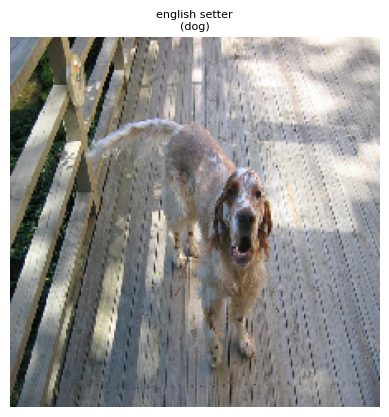

In [75]:
random_file = np.random.choice(os.listdir('annotations/xmls/'))
img_name = f'{random_file[:-4]}.jpg'
label = label_mapping[img_name]
img = image.load_img('images/'+img_name, target_size=(224, 224))
# Determine if the image is a dog or a cat using the breed_to_vgg16_mapping
animal_type, _ = breed_to_vgg16_mapping.get(label, (None, None))

plt.imshow(img)
plt.title(f"{label}\n({animal_type})", fontsize=8)
plt.axis('off')
plt.show()

Predicting that one picture:

In [76]:
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(img_array_expanded_dims)
predictions = model.predict(preprocessed_img)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Determine the actual animal type and specific VGG16 label (if any) for the breed
actual_animal_type, actual_vgg16_label = breed_to_vgg16_mapping.get(label, (None, None))

# Prepare message about the breed's presence in VGG16
breed_presence_message = "This breed is recognized by VGG16." if actual_vgg16_label else "This breed is not specifically recognized by VGG16."
print(breed_presence_message)

for i, (imagenet_id, predicted_label, score) in enumerate(decoded_predictions):
    # Determine the animal type of the predicted label
    predicted_animal_type, _ = vgg16_to_breed_mapping.get(predicted_label, (None, None))
    animal_type_text = f"({predicted_animal_type})" if predicted_animal_type else "(Unknown animal type)"

    # Check accuracy
    if actual_vgg16_label:
        accuracy_text = " ---- correct breed" if predicted_label == actual_vgg16_label else " ---- wrong breed"
    else:
        # If breed is not recognized by VGG16, check if animal type is correct
        accuracy_text = " ---- correct animal type" if predicted_animal_type == actual_animal_type else " ---- wrong animal type"

    print(f"{i + 1}: {predicted_label} {animal_type_text} ({score:.2f}){accuracy_text}")


1/1 [==============================] - 1s 580ms/step
This breed is recognized by VGG16.
1: basset (dog) (0.41) ---- wrong breed
2: English_setter (dog) (0.15) ---- correct breed
3: bluetick (dog) (0.13) ---- wrong breed


## Classification to 30 random picture from Oxford-IIIT Pet dataset:

Selecting 30 random pictures from the dataset:

In [96]:
filenames = os.listdir('annotations/xmls/')
selected_files = np.random.choice(filenames, size=30, replace=False)

Preparing the images and labels for display:

In [97]:
images = []
labels = []
for file in selected_files:
    img_filename = f'{file[:-4]}.jpg'
    if img_filename in label_mapping:
        img = image.load_img('images/' + img_filename, target_size=(224, 224))
        images.append(img)
        labels.append(label_mapping[img_filename])

Displaying images in a 6x5 grid with labels:

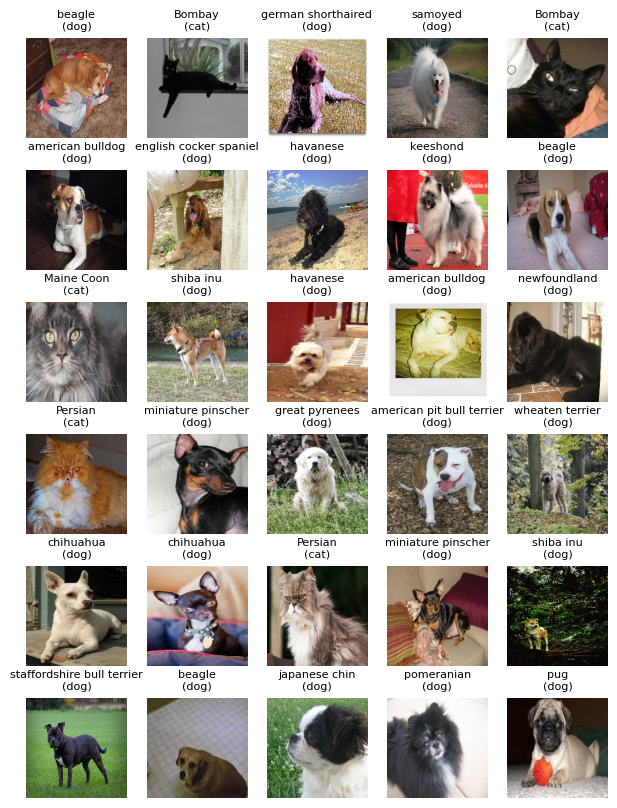

In [98]:
plt.figure(figsize=(7.5, 10))
for i, (img, label) in enumerate(zip(images, labels)):
    # Determine if the image is a dog or a cat using the breed_to_vgg16_mapping
    animal_type, _ = breed_to_vgg16_mapping.get(label, (None, None))

    plt.subplot(6, 5, i+1)
    plt.imshow(img)
    plt.title(f"{label}\n({animal_type})", fontsize=8)
    plt.axis('off')
plt.show()

Predicting the images:

In [102]:
predictions = []
for img in images:
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(img_array_expanded_dims)
    preds = model.predict(preprocessed_img)
    predictions.append(decode_predictions(preds, top=1)[0][0])

1/1 [==============================] - 1s 582ms/step


Displaying the predictions in a 6x5 grid:

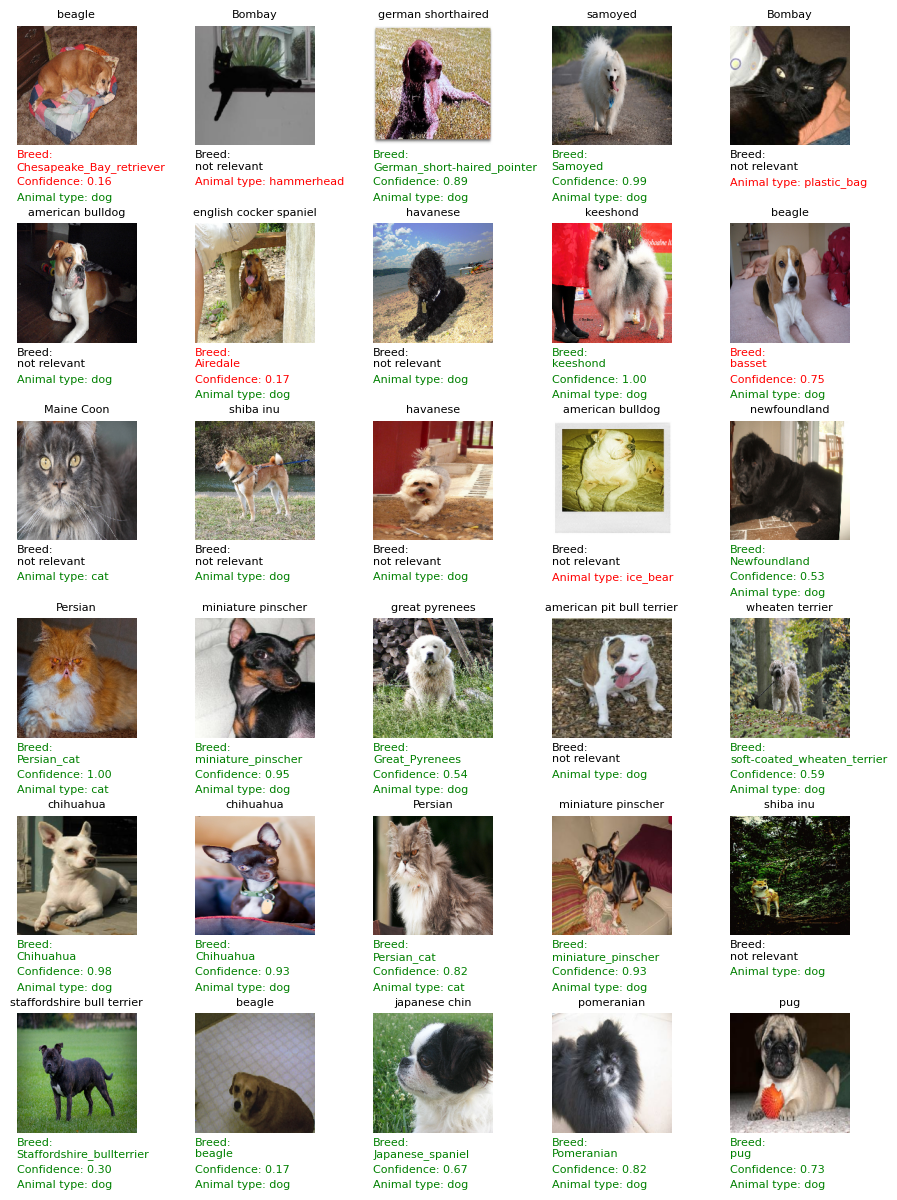

In [103]:
# Initialize counts for statistic analysis
correct_breed_predictions_count = 0
correct_animal_type_predictions_count = 0
relevant_predictions_count = 0

# Display predictions
plt.figure(figsize=(9, 12))
for i, (img, label, pred) in enumerate(zip(images, labels, predictions)):
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

    # Extract the predicted VGG16 breed label and its confidence score
    predicted_vgg16_label, confidence = pred[1], pred[2]

    # Determine actual and predicted animal type and breed
    actual_animal_type, actual_vgg16_label = breed_to_vgg16_mapping.get(label, (None, None))
    predicted_animal_type, predicted_breed = vgg16_to_breed_mapping.get(predicted_vgg16_label, (None, None))
    if not predicted_animal_type:
      predicted_animal_type = predicted_vgg16_label

    # Check if the breed prediction matches the actual breed based on the mappings
    is_relevant = actual_vgg16_label is not None
    is_correct_breed = (actual_vgg16_label == predicted_vgg16_label)
    is_correct_animal_type = (actual_animal_type == predicted_animal_type)

    # Update correct predictions count based on relevance and correctness
    if is_relevant:
        relevant_predictions_count += 1
    if is_correct_breed:
        correct_breed_predictions_count += 1
    if is_correct_animal_type:
        correct_animal_type_predictions_count += 1

    plt.title(label, fontsize=8)

    # Print the predictions below each picture
    type_pred_color = 'green' if is_correct_animal_type else 'red'
    if not is_relevant:
        # VGG16 was not trained on this breed
        plt.text(0, -0.2, "Breed:\nnot relevant", fontsize=8, transform=plt.gca().transAxes)
        plt.text(0, -0.33, f"Animal type: {predicted_animal_type}", fontsize=8, color=type_pred_color, transform=plt.gca().transAxes)
    else:
        # VGG16 was trained on this breed
        breed_pred_color = 'green' if is_correct_breed else 'red'
        plt.text(0, -0.2, f"Breed:\n{predicted_vgg16_label}", fontsize=8, color=breed_pred_color, transform=plt.gca().transAxes)
        plt.text(0, -0.33, f"Confidence: {confidence:.2f}", fontsize=8, color=breed_pred_color, transform=plt.gca().transAxes)
        plt.text(0, -0.46, f"Animal type: {predicted_animal_type}", fontsize=8, color=type_pred_color, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

Analysing the accuracy rates of VGG16 on 30 pictures from Oxford-IIIT Pet dataset:

In [104]:
# Calculate percentages
breed_accuracy_percentage = (correct_breed_predictions_count / relevant_predictions_count) * 100 if relevant_predictions_count > 0 else 0
animal_type_accuracy_percentage = (correct_animal_type_predictions_count / len(predictions)) * 100 if len(predictions) > 0 else 0

# Print summary with percentages
print(f"Correct breed predictions (relevant only): {correct_breed_predictions_count}/{relevant_predictions_count} ({breed_accuracy_percentage:.2f}%)")
print(f"Correct animal type predictions: {correct_animal_type_predictions_count}/{len(predictions)} ({animal_type_accuracy_percentage:.2f}%)")


Correct breed predictions (relevant only): 17/20 (85.00%)
Correct animal type predictions: 27/30 (90.00%)
